# Unemployment in India

## Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

### Loading the dataset

In [2]:
df1=pd.read_csv("unemployment in india.csv")
df2=pd.read_csv("Unemployment_Rate_upto_11_2020.csv")

## Data cleaning

In [3]:
df1.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [4]:
df2.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [6]:
# getting null values
df1.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [7]:
# dropping null values
df1.dropna(inplace=True)

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 46.2+ KB


In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [10]:
# getting out the columns in df1
df1.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [11]:
# getting out the columns in df2
df2.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [12]:
# removing spaces from the column name
df1.columns=df1.columns.str.strip()
df2.columns=df2.columns.str.strip()

In [13]:
# converting the date(object) column to datetime(datetime64[ns])
df1['Date']=pd.to_datetime(df1["Date"],dayfirst=False, errors="coerce")
df2['Date']=pd.to_datetime(df2['Date'], dayfirst=False, errors="coerce")

C:\Users\USER\AppData\Local\Temp\ipykernel_11220\3979447189.py:2: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df1['Date']=pd.to_datetime(df1["Date"],dayfirst=False, errors="coerce")
C:\Users\USER\AppData\Local\Temp\ipykernel_11220\3979447189.py:3: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df2['Date']=pd.to_datetime(df2['Date'], dayfirst=False, errors="coerce")


In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Region                                   740 non-null    object        
 1   Date                                     740 non-null    datetime64[ns]
 2   Frequency                                740 non-null    object        
 3   Estimated Unemployment Rate (%)          740 non-null    float64       
 4   Estimated Employed                       740 non-null    float64       
 5   Estimated Labour Participation Rate (%)  740 non-null    float64       
 6   Area                                     740 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 46.2+ KB


In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Region                                   267 non-null    object        
 1   Date                                     267 non-null    datetime64[ns]
 2   Frequency                                267 non-null    object        
 3   Estimated Unemployment Rate (%)          267 non-null    float64       
 4   Estimated Employed                       267 non-null    int64         
 5   Estimated Labour Participation Rate (%)  267 non-null    float64       
 6   Region.1                                 267 non-null    object        
 7   longitude                                267 non-null    float64       
 8   latitude                                 267 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(1), 

In [16]:
df1.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural


In [17]:
df2.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.74


In [18]:
print("df1 date range is",df1["Date"].min(), "to", df1["Date"].max())

df1 date range is 2019-05-31 00:00:00 to 2020-06-30 00:00:00


In [19]:
print("df2 date range is", df2["Date"].min(), "to", df2["Date"].max())

df2 date range is 2020-01-31 00:00:00 to 2020-10-31 00:00:00


In [20]:
df1.columns
 

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [21]:
df2.columns

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [22]:
df1.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural


In [23]:
df2.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.74


### Standardizing the frequency column

In [24]:
df1["Frequency"]=df1["Frequency"].str.strip().replace({"Monthly": "M"})

In [25]:
df1.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,2019-05-31,M,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,2019-06-30,M,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,2019-07-31,M,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,2019-08-31,M,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,2019-09-30,M,5.17,12256762.0,44.68,Rural


In [26]:
df1["Frequency"].unique()

array(['M'], dtype=object)

In [27]:
df2["Frequency"].unique()

array([' M'], dtype=object)

In [28]:
# renaming the dropped columns as a variable
df1_dropped_columns=df1["Area"]

In [29]:
# renaming the dropped columns as a variable
df1_dropped_columns

0      Rural
1      Rural
2      Rural
3      Rural
4      Rural
       ...  
749    Urban
750    Urban
751    Urban
752    Urban
753    Urban
Name: Area, Length: 740, dtype: object

In [30]:
# dropping a column in df1
df1.drop(columns="Area", inplace=True)

In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 753
Data columns (total 6 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Region                                   740 non-null    object        
 1   Date                                     740 non-null    datetime64[ns]
 2   Frequency                                740 non-null    object        
 3   Estimated Unemployment Rate (%)          740 non-null    float64       
 4   Estimated Employed                       740 non-null    float64       
 5   Estimated Labour Participation Rate (%)  740 non-null    float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 40.5+ KB


In [32]:
# checking the columns in df2
df2.columns

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [33]:
# renaming dropped columns as a variable
df2_dropped_columns=df2[["Region.1","longitude","latitude"]]

In [34]:
df2_dropped_columns

,Region.1,longitude,latitude
0,South,15.9129,79.740
1,South,15.9129,79.740
2,South,15.9129,79.740
3,South,15.9129,79.740
4,South,15.9129,79.740
...,...,...,...
262,East,22.9868,87.855
263,East,22.9868,87.855
264,East,22.9868,87.855
265,East,22.9868,87.855


In [35]:
# dropping the columns while still maintaining the dataframe
df2.drop(columns=["Region.1","longitude","latitude"],inplace=True)

In [36]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 753
Data columns (total 6 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Region                                   740 non-null    object        
 1   Date                                     740 non-null    datetime64[ns]
 2   Frequency                                740 non-null    object        
 3   Estimated Unemployment Rate (%)          740 non-null    float64       
 4   Estimated Employed                       740 non-null    float64       
 5   Estimated Labour Participation Rate (%)  740 non-null    float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 40.5+ KB


In [37]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 6 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Region                                   267 non-null    object        
 1   Date                                     267 non-null    datetime64[ns]
 2   Frequency                                267 non-null    object        
 3   Estimated Unemployment Rate (%)          267 non-null    float64       
 4   Estimated Employed                       267 non-null    int64         
 5   Estimated Labour Participation Rate (%)  267 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 12.6+ KB


In [38]:
# concatenating df1 and df2
df=pd.concat([df1,df2], ignore_index=True)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 6 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Region                                   1007 non-null   object        
 1   Date                                     1007 non-null   datetime64[ns]
 2   Frequency                                1007 non-null   object        
 3   Estimated Unemployment Rate (%)          1007 non-null   float64       
 4   Estimated Employed                       1007 non-null   float64       
 5   Estimated Labour Participation Rate (%)  1007 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 47.3+ KB


In [40]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
0,Andhra Pradesh,2019-05-31,M,3.65,11999139.0,43.24
1,Andhra Pradesh,2019-06-30,M,3.05,11755881.0,42.05
2,Andhra Pradesh,2019-07-31,M,3.75,12086707.0,43.50
3,Andhra Pradesh,2019-08-31,M,3.32,12285693.0,43.97
4,Andhra Pradesh,2019-09-30,M,5.17,12256762.0,44.68


#### checking for duplicates

In [41]:
df.duplicated().sum()

0

## Exploratory data analysis

In [42]:
df.describe()

,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,1007,1007.000000,1.007000e+03,1007.000000
mean,2020-01-31 06:06:04.647467776,11.906991,8.996209e+06,42.378620
min,2019-05-31 00:00:00,0.000000,4.942000e+04,13.330000
25%,2019-09-30 00:00:00,4.685000,1.639125e+06,37.835000
50%,2020-01-31 00:00:00,8.890000,5.543380e+06,40.880000
75%,2020-05-31 00:00:00,16.125000,1.287115e+07,45.315000
max,2020-10-31 00:00:00,76.740000,5.943376e+07,72.570000
std,NaN,10.739549,1.020784e+07,8.048542


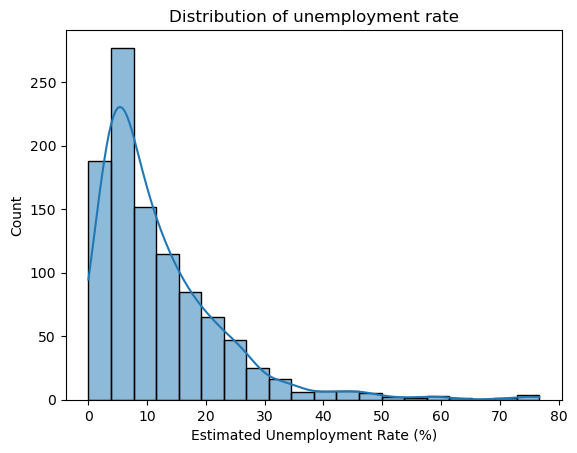

In [ ]:
sns.histplot(df["Estimated Unemployment Rate (%)"], bins=20, kde=True)
plt.title("Distribution of unemployment rate")
plt.show()

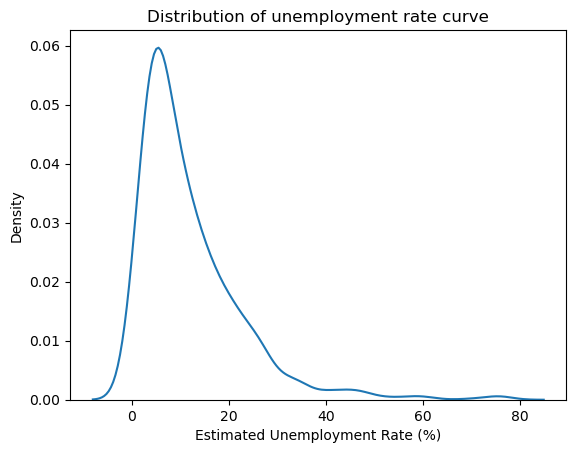

In [51]:
sns.kdeplot(df["Estimated Unemployment Rate (%)"])
plt.title("Distribution of unemployment rate curve")
plt.show()

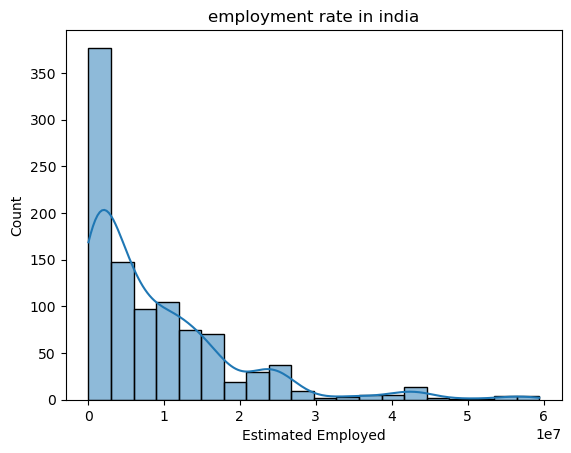

In [47]:
sns.histplot(df["Estimated Employed"], bins=20, kde=True)
plt.title("employment rate in india")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

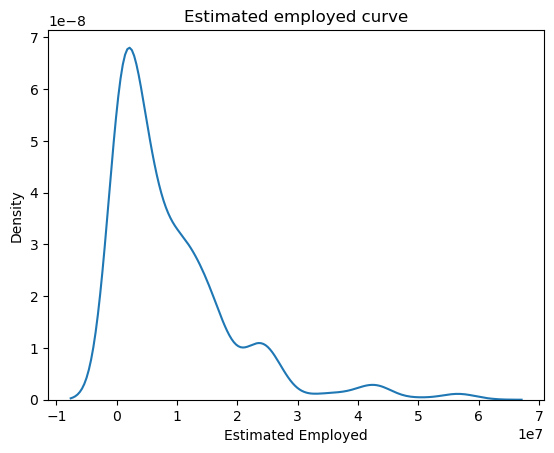

In [49]:
sns.kdeplot(df["Estimated Employed"])
plt.title("Estimated employed curve")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

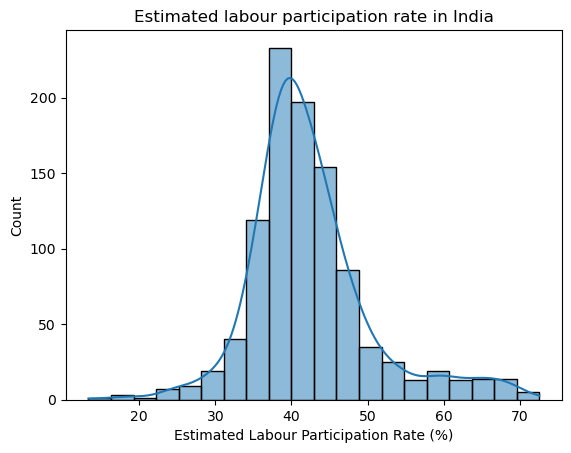

In [53]:
sns.histplot(df["Estimated Labour Participation Rate (%)"], bins=20, kde=True)
plt.title("Estimated labour participation rate in India")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

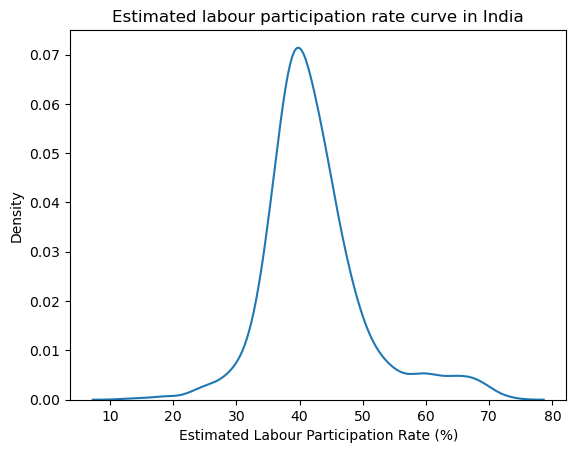

In [55]:
sns.kdeplot(df["Estimated Labour Participation Rate (%)"])
plt.title("Estimated labour participation rate curve in India")
plt.show

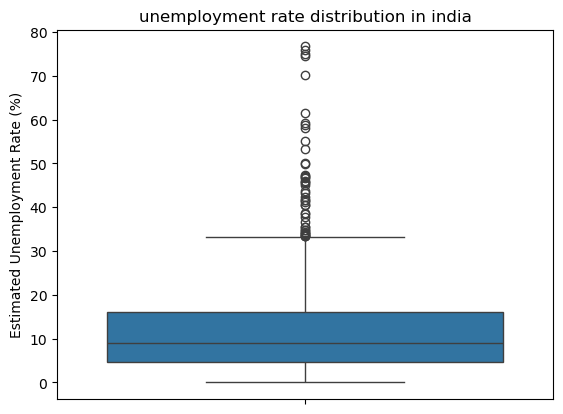

In [ ]:
sns.boxplot(y=df["Estimated Unemployment Rate (%)"])
plt.title("unemployment rate distribution in india")
plt.show()

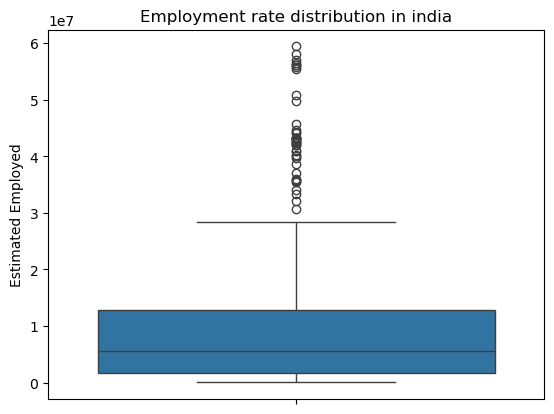

In [58]:
sns.boxplot(y=df["Estimated Employed"])
plt.title("Employment rate distribution in india")
plt.show()

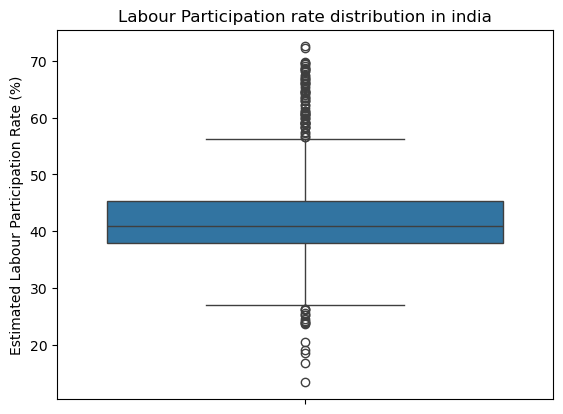

In [59]:
sns.boxplot(y=df["Estimated Labour Participation Rate (%)"])
plt.title("Labour Participation rate distribution in india")
plt.show()

In [61]:
corr_matrix=df[["Estimated Employed","Estimated Unemployment Rate (%)", "Estimated Labour Participation Rate (%)"]].corr()

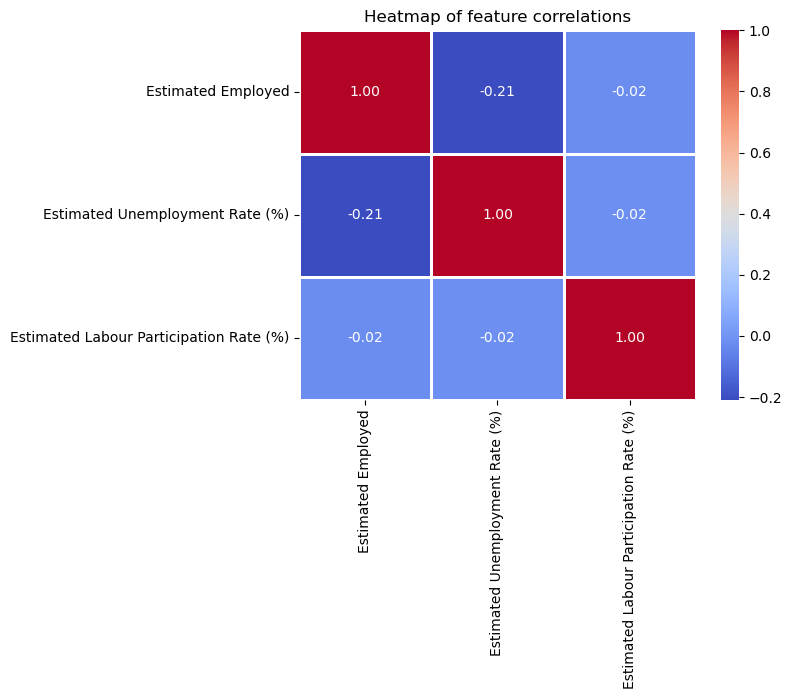

In [64]:
sns.heatmap(corr_matrix,annot=True, cmap="coolwarm", fmt=".2f",linewidths=1)
plt.title("Heatmap of feature correlations")
plt.show()

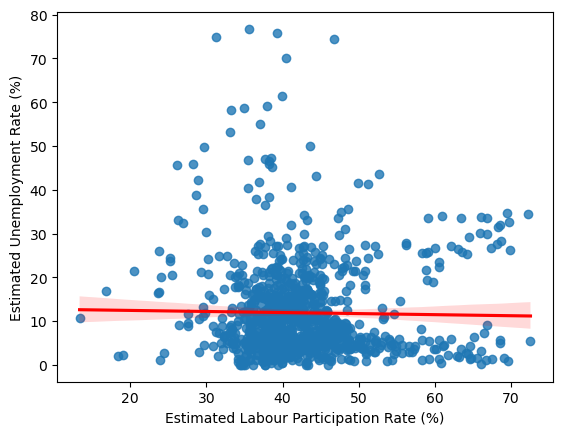

In [78]:
sns.regplot(data=df, y="Estimated Unemployment Rate (%)", x= "Estimated Labour Participation Rate (%)",line_kws={"color":"red"})
plt.show()

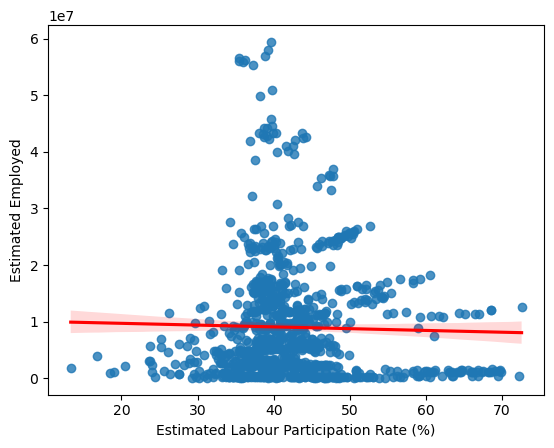

In [79]:

sns.regplot(data=df, y="Estimated Employed", x= "Estimated Labour Participation Rate (%)",line_kws={"color":"red"})
plt.show()


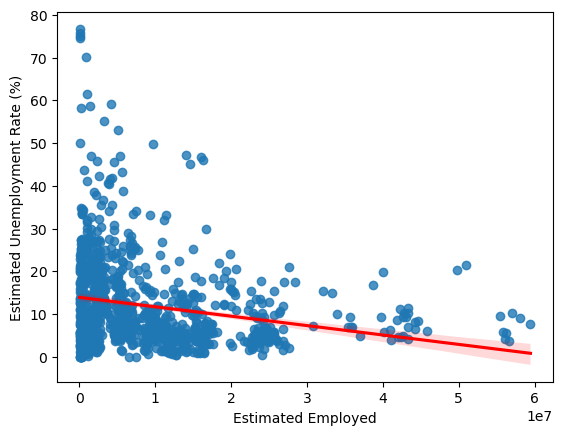

In [80]:
sns.regplot(data=df, y="Estimated Unemployment Rate (%)", x= "Estimated Employed",line_kws={"color":"red"})
plt.show()

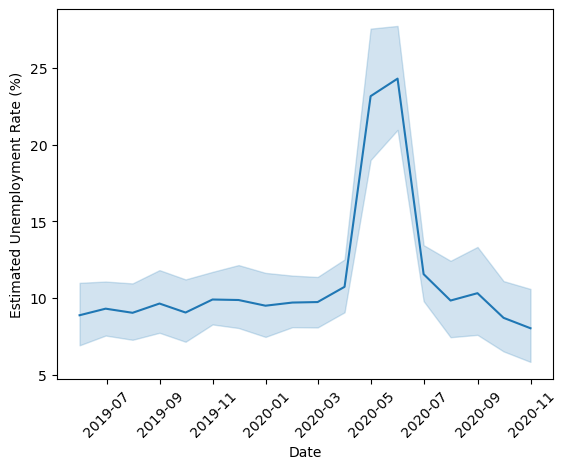

In [68]:
sns.lineplot(data=df,x="Date", y="Estimated Unemployment Rate (%)")
plt.xticks(rotation=45)
plt.show()

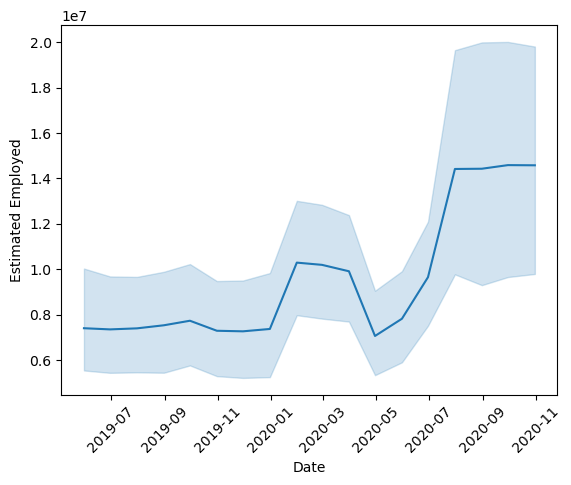

In [69]:
sns.lineplot(data=df,x="Date", y="Estimated Employed")
plt.xticks(rotation=45)
plt.show()

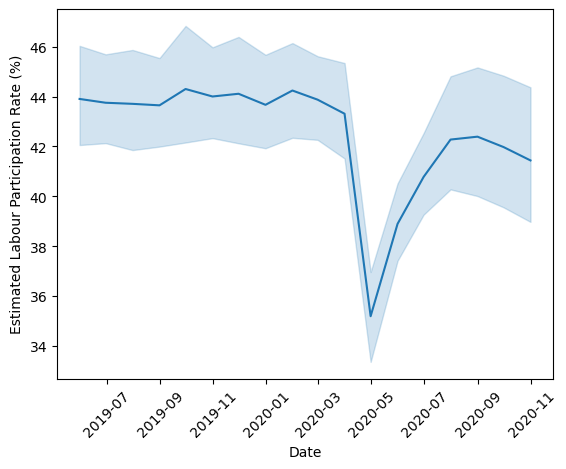

In [70]:
sns.lineplot(data=df,x="Date", y="Estimated Labour Participation Rate (%)")
plt.xticks(rotation=45)
plt.show()

In [81]:
df1_dropped_columns

0      Rural
1      Rural
2      Rural
3      Rural
4      Rural
       ...  
749    Urban
750    Urban
751    Urban
752    Urban
753    Urban
Name: Area, Length: 740, dtype: object

In [85]:
df1_dropped_columns.unique()

array(['Rural', 'Urban'], dtype=object)

In [82]:
df2_dropped_columns

,Region.1,longitude,latitude
0,South,15.9129,79.740
1,South,15.9129,79.740
2,South,15.9129,79.740
3,South,15.9129,79.740
4,South,15.9129,79.740
...,...,...,...
262,East,22.9868,87.855
263,East,22.9868,87.855
264,East,22.9868,87.855
265,East,22.9868,87.855
